In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

### Importing datasets
Keras already incorporates image datasets of clothes that can be imported using `keras.datasets.fashion_mnist`. There are about 60000 examples of 28*28 images.

In [3]:
fashion = keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [5]:
train_x.shape

(60000, 28, 28)

In [6]:
train_y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

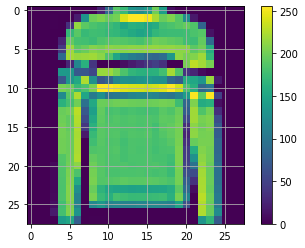

In [7]:
plt.figure()
plt.imshow(train_x[5])
plt.colorbar()
plt.grid(True)

In [8]:
train_x = train_x/255
test_x = test_x/255

### Building the model
Here, a Sequential model is built that will initially flatten the image matrices. This will be processed with an fully connected or densely connected layer with 254 nodes. The ReLU activation will be applied to this layer. Finally, as this is classification problem, the last layer will contain 10 nodes with softmax activation.

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(254, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Optimizer, Loss and Metrics
Optimizer, lossfunction and metrics can be declared in the `model.compile()` method.

In [26]:
model.compile(optimizer = Adam(), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

### Training the model
The model will be trained using `model.fit()` that takes the training set as arguments, along with number of epochs and batch size.

In [27]:
model.fit(train_x, train_y,epochs = 100, batch_size = 256)

2021-10-17 15:45:23.617681: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.5688 - accuracy: 0.8055
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.4081 - accuracy: 0.8572
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.3644 - accuracy: 0.8714
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.3435 - accuracy: 0.8774
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.3212 - accuracy: 0.8841
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.3019 - accuracy: 0.8917
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2937 - accuracy: 0.8936
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2797 - accuracy: 0.8984
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2715 - accuracy: 0.9021
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.255

235/235 [==============================] - 2s 10ms/step - loss: 0.0475 - accuracy: 0.9843
Epoch 81/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0511 - accuracy: 0.9818
Epoch 82/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0496 - accuracy: 0.9825
Epoch 83/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0461 - accuracy: 0.9841
Epoch 84/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0462 - accuracy: 0.9844
Epoch 85/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0448 - accuracy: 0.9844
Epoch 86/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0405 - accuracy: 0.9866
Epoch 87/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0416 - accuracy: 0.9864
Epoch 88/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0473 - accuracy: 0.9836
Epoch 89/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0452 - 

### Evaluating the model
The model can be analysed using `model.evaluate()` that takes the test dataset as arguments.

In [28]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.5921 - accuracy: 0.8897


[0.5921422243118286, 0.8896999955177307]